# Phase II

In [10]:
from IPython.display import HTML
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore") 
from pprint import pprint
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
from scipy.stats import normaltest,pearsonr,spearmanr
from itertools import combinations
import statsmodels.api as sm
from random import choice

In [11]:
HTML('''<script>code_show=true;function code_toggle() {if (code_show){
$('div.input').hide();} else {$('div.input').show();}code_show = !code_show} 
$( document ).ready(code_toggle);</script><a href="javascript:code_toggle()">Toggle Code</a>.''')

In [12]:
data = pd.read_csv('Phase2_Data_raw.csv')

In [13]:
data.head()

,Unnamed: 0,Unnamed: 0.1,GEOID,year,name,parent-location,population,poverty-rate,pct-renter-occupied,median-gross-rent,...,pct-multiple,pct-other,renter-occupied-households,eviction-filings,evictions,eviction-rate,eviction-filing-rate,low-flag,imputed,subbed
0,0,17,1001,2000,Autauga County,Alabama,43671,10.92,19.21,537.0,...,0.86,0.10,3074,61.0,40.0,1.30,1.98,0,0,1
1,1,18,1003,2000,Baldwin County,Alabama,140415,10.15,20.46,566.0,...,0.93,0.07,11320,213.0,65.0,0.57,1.88,0,0,1
2,2,19,1005,2000,Barbour County,Alabama,29038,26.80,26.87,333.0,...,0.66,0.01,2797,15.0,11.0,0.39,0.54,0,0,0
3,3,20,1007,2000,Bibb County,Alabama,20826,20.61,19.81,348.0,...,0.47,0.00,1470,13.0,8.0,0.54,0.88,0,0,0
4,4,21,1009,2000,Blount County,Alabama,51024,11.74,16.56,385.0,...,0.80,0.03,3190,NaN,NaN,NaN,NaN,0,0,0


In [14]:
data.name = data.name.astype(str,errors='ignore')
data = data.drop(['Unnamed: 0', 'Unnamed: 0.1'],axis=1)

In [15]:
data.describe()

,GEOID,year,population,poverty-rate,pct-renter-occupied,median-gross-rent,median-household-income,median-property-value,rent-burden,pct-white,...,pct-multiple,pct-other,renter-occupied-households,eviction-filings,evictions,eviction-rate,eviction-filing-rate,low-flag,imputed,subbed
count,53399.000000,53399.000000,5.339900e+04,53399.000000,53399.000000,53388.000000,53393.000000,5.338100e+04,53389.000000,53399.000000,...,53399.000000,53399.000000,5.339900e+04,44168.000000,41339.000000,41339.000000,44168.000000,53399.000000,53399.000000,53399.000000
mean,30391.058597,2008.001685,9.592244e+04,12.523653,27.314985,596.199914,42403.379563,1.178802e+05,26.755051,79.097798,...,1.471849,0.088672,1.274769e+04,835.508966,373.974479,1.676692,3.009484,0.011461,0.083354,0.198094
std,15155.854410,4.898624,3.096801e+05,6.091864,8.010675,199.370651,12084.988035,7.754590e+04,4.772766,19.594738,...,1.552049,0.156178,5.086303e+04,4278.936737,1542.781414,1.977126,4.916657,0.106441,0.276419,0.398567
min,1001.000000,2000.000000,6.700000e+01,0.000000,7.350000,178.000000,9333.000000,0.000000e+00,8.100000,0.950000,...,0.000000,0.000000,5.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18179.000000,2004.000000,1.103200e+04,8.230000,21.990000,461.000000,34045.000000,7.420000e+04,23.500000,68.170000,...,0.720000,0.000000,1.049000e+03,3.000000,3.000000,0.320000,0.350000,0.000000,0.000000,0.000000
50%,29177.000000,2008.000000,2.542600e+04,11.520000,25.930000,570.000000,40677.000000,9.600000e+04,26.700000,86.550000,...,1.140000,0.040000,2.555000e+03,30.000000,25.000000,1.110000,1.450000,0.000000,0.000000,0.000000
75%,45081.000000,2012.000000,6.495800e+04,15.500000,31.140000,685.000000,48384.000000,1.374000e+05,29.800000,94.525000,...,1.730000,0.110000,7.151000e+03,210.000000,140.000000,2.310000,3.550000,0.000000,0.000000,0.000000
max,56045.000000,2016.000000,1.003839e+07,56.920000,100.000000,2001.000000,123453.000000,1.000001e+06,50.100000,100.000000,...,33.330000,4.900000,1.792186e+06,143753.000000,47716.000000,24.160000,118.620000,1.000000,1.000000,1.000000


In [16]:
#creating a concatenated field of name and parent-location, since same town name can appear in multiple states
data['full_name'] = data.name + "-" + data['parent-location']

In [17]:
counties = data.full_name.unique()

In [18]:
#some functions I use
def percentify(numerator,denominator):
    return str(int(numerator/denominator*100))+'%'
def commafy(number):
    return "{:,}".format(int(number))

# <font color='#31b1ed'> Fields Added </font> 

#### full_name: Concatentation of name and parent-location (because many town names are duplicated across states)

#  <font color='#31b1ed'> Data Validation & Cleansing </font>

## *Ensure the data we have is the data we expect*

##### <font color='#3dad00'>Columns available</font> 

In [19]:
print(data.columns.values)

['GEOID' 'year' 'name' 'parent-location' 'population' 'poverty-rate'
 'pct-renter-occupied' 'median-gross-rent' 'median-household-income'
 'median-property-value' 'rent-burden' 'pct-white' 'pct-af-am'
 'pct-hispanic' 'pct-am-ind' 'pct-asian' 'pct-nh-pi' 'pct-multiple'
 'pct-other' 'renter-occupied-households' 'eviction-filings' 'evictions'
 'eviction-rate' 'eviction-filing-rate' 'low-flag' 'imputed' 'subbed'
 'full_name']


In [20]:
print("Number of unique counties: ",len(data.full_name.unique()))

Number of unique counties:  3146


##### <font color='#3dad00'>Max/Min years in data set</font> 

In [21]:
print('Earliest year in data set: ', data.year.min())
print('Latest year in data set: ', data.year.max())

Earliest year in data set:  2000
Latest year in data set:  2016


##### <font color='#ad1100'>All geographic locations at all levels have the same amount of data: </font> 

In [22]:
data[['full_name','year']].groupby(by='full_name').count()

,year
full_name,
Abbeville County-South Carolina,17
Acadia Parish-Louisiana,17
Accomack County-Virginia,17
Ada County-Idaho,17
Adair County-Iowa,17
Adair County-Kentucky,17
Adair County-Missouri,17
Adair County-Oklahoma,17
Adams County-Colorado,17


Years of data by county:
min:  5
max:  17
avg:  16.97
stdev:  0.5


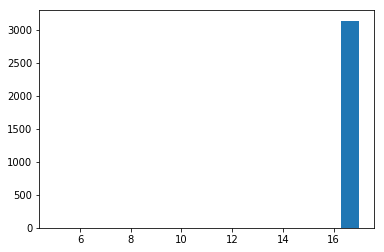

In [23]:
print('Years of data by county:')
print('min: ',data[['full_name','year']].groupby(by='full_name').count().min()[0])
print('max: ',data[['full_name','year']].groupby(by='full_name').count().max()[0])
print('avg: ',round(data[['full_name','year']].groupby(by='full_name').count().mean()[0],2))
print('stdev: ',round(data[['full_name','year']].groupby(by='full_name').count().std()[0],3))
histogram = plt.hist(data[['full_name','year']].groupby(by='full_name').count()['year'],bins=17)
plt.show()

##### <font color='#3dad00'> Fields using percentages do not contain percentages that exceed 100% or fall below 0% </font> 

In [24]:
columns = ['pct-renter-occupied','pct-white','pct-af-am','pct-hispanic','pct-am-ind','pct-asian','pct-nh-pi','pct-multiple','pct-other']
percentage_fields = data[columns]
per_df = pd.DataFrame(None, columns=['max_per','max_name','max_pop','min_per','min_name','min_pop'],index=columns)
for c in columns:
    wax = data[c].max()
    win = data[c].min()
    waxName = data.full_name[data[c] == wax].iloc[0]
    winName = data.full_name[data[c] == win].iloc[0]
    per_df.max_per[c] = wax #max percent
    per_df.max_name[c] = waxName #name of that location
    per_df.max_pop[c] = data.population[data.full_name == waxName].iloc[0] #population of that location
    per_df.min_per[c] = win
    per_df.min_name[c] = winName
    per_df.min_pop[c] = data.population[data.full_name == winName].iloc[0]
per_df

,max_per,max_name,max_pop,min_per,min_name,min_pop
pct-renter-occupied,100,Kalawao County-Hawaii,147,7.35,Catron County-New Mexico,3543
pct-white,100,Robertson County-Kentucky,2266,0.95,Starr County-Texas,53597
pct-af-am,86.76,Jefferson County-Mississippi,9740,0,Gilmer County-Georgia,23456
pct-hispanic,98.71,Starr County-Texas,53597,0,Wilcox County-Alabama,13183
pct-am-ind,94.95,Wade Hampton Census Area-Alaska,7028,0,Choctaw County-Alabama,15922
pct-asian,47.48,Aleutians East Borough-Alaska,2697,0,Clay County-Alabama,14254
pct-nh-pi,48.89,Kalawao County-Hawaii,147,0,Butler County-Alabama,21399
pct-multiple,33.33,Kalawao County-Hawaii,147,0,Wilcox County-Alabama,13183
pct-other,4.9,Dukes County-Massachusetts,14987,0,Bibb County-Alabama,20826


##### <font color='#3dad00'> Sum of demographics fields equals 100% </font> 

In [25]:
demo_cols = ['pct-white','pct-af-am','pct-hispanic','pct-am-ind','pct-asian','pct-nh-pi','pct-multiple','pct-other']
demos = data[demo_cols]
demos_sums = demos.sum(axis=1)
bad_demos = demos_sums[(demos_sums > 100.04) & (demos_sums < 99.96)]
print("Number of fields where demographics do not total 100%: ",len(bad_demos))

Number of fields where demographics do not total 100%:  0


##### If population is zero, delete the record

In [26]:
print("Number of records where population is less than or equal to zero: ", len(data[data.population<=0]))

Number of records where population is less than or equal to zero:  0


In [27]:
data = data[data.population>0]
print('...Processing complete')

...Processing complete


In [28]:
print("Number of records where population is less than or equal to zero: ", len(data[data.population<=0]))

Number of records where population is less than or equal to zero:  0


##### If duplicate record, delete

In [29]:
print('Current number of records: ',commafy(len(data)))

Current number of records:  53,399


In [30]:
data = data.drop_duplicates()

In [31]:
print("...Processing complete")
print('Current number of records: ',commafy(len(data)))
print("Number of records removed: ",commafy(len(data)-len(data)))

...Processing complete
Current number of records:  53,399
Number of records removed:  0


##### <font color='#f44b42'> Missing Data </font> 

In [32]:
cols = data.columns.values
dfmissing = pd.DataFrame(columns=['Number Missing'],index=cols)
print('Number of missing values in each column:')
for col in cols:
    missing = data[col].isnull().sum()
    if missing > 0:
        dfmissing.loc[col]=missing
    else:
        dfmissing = dfmissing.drop([col])
dfmissing

Number of missing values in each column:


,Number Missing
median-gross-rent,11
median-household-income,6
median-property-value,18
rent-burden,10
eviction-filings,9231
evictions,12060
eviction-rate,12060
eviction-filing-rate,9231


In [24]:
print('going to remove any records where the eviction-rate data is missing now. Later I will remove records where the others are missing, if those variables are being used to build the best model')

going to remove any records where the eviction-rate data is missing now. Later I will remove records where the others are missing, if those variables are being used to build the best model


In [25]:
data = data.dropna(subset=['eviction-rate'])

In [26]:
cols = data.columns.values
dfmissing = pd.DataFrame(columns=['Number Missing'],index=cols)
print('Number of missing values in each column:')
print('...looks like the values that were missing in eviction-filings, eviction-filing-rate, and evictions were included with the missing values of eviction-rates')
for col in cols:
    missing = data[col].isnull().sum()
    if missing > 0:
        dfmissing.loc[col]=missing
    else:
        dfmissing = dfmissing.drop([col])
dfmissing

Number of missing values in each column:
...looks like the values that were missing in eviction-filings, eviction-filing-rate, and evictions were included with the missing values of eviction-rates


,Number Missing
median-gross-rent,11
median-household-income,6
median-property-value,18
rent-burden,10


Years of data by county:
min:  2
max:  17
avg:  14.97
stdev:  3.55


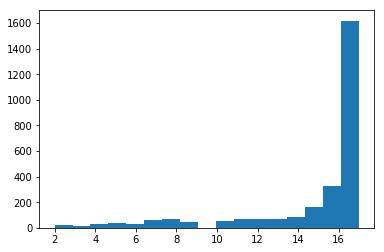

In [27]:
print('Years of data by county:')
print('min: ',data[['full_name','year']].groupby(by='full_name').count().min()[0])
print('max: ',data[['full_name','year']].groupby(by='full_name').count().max()[0])
print('avg: ',round(data[['full_name','year']].groupby(by='full_name').count().mean()[0],2))
print('stdev: ',round(data[['full_name','year']].groupby(by='full_name').count().std()[0],3))
histogram = plt.hist(data[['full_name','year']].groupby(by='full_name').count()['year'],bins=17)
plt.show()

# <font color='#0b80a0'> Modeling </font>

## <font color='#0b80a0'> Build an overall regression for the entire country </font> 

##### <font color='#0b80a0'> Test correlation of independent variables on dependent variable throw out those not correlated. < 0.70 correlation coefficient </font> 

In [301]:
xVars = ['population',
       'poverty-rate', 'pct-renter-occupied', 'median-gross-rent',
       'median-household-income', 'median-property-value', 'rent-burden',
       'pct-white', 'pct-af-am', 'pct-hispanic', 'pct-am-ind', 'pct-asian',
       'pct-nh-pi', 'pct-multiple', 'pct-other',
       'renter-occupied-households', 'eviction-filings', 'evictions',
       'eviction-filing-rate']
yVar = 'eviction-rate'
y = data[yVar]

In [302]:
print('# possible independent variables: ',len(xVars))

# possible independent variables:  19


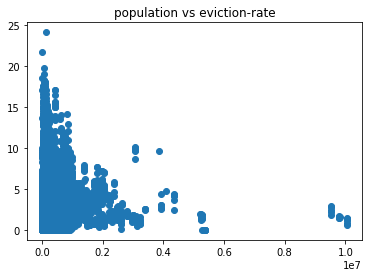

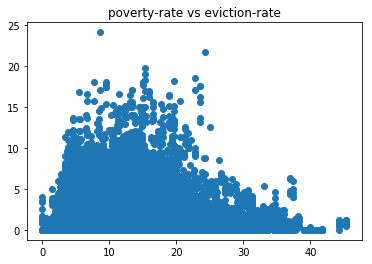

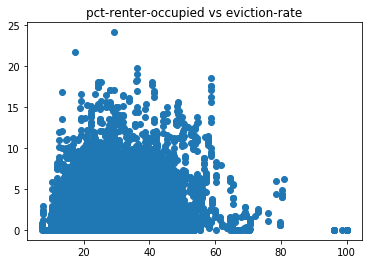

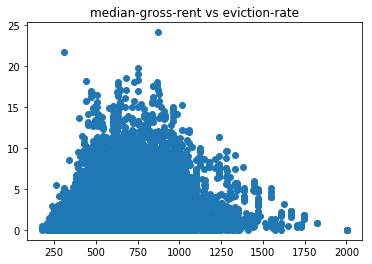

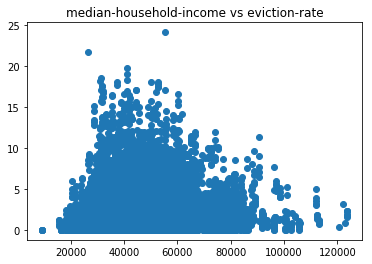

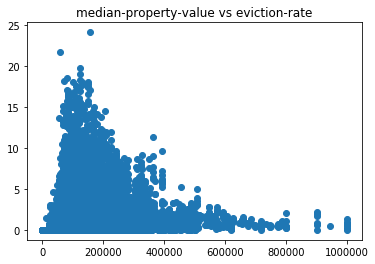

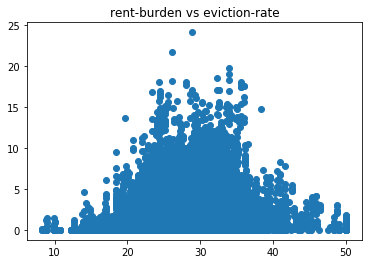

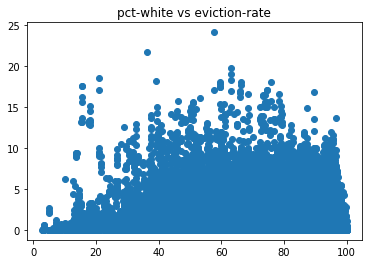

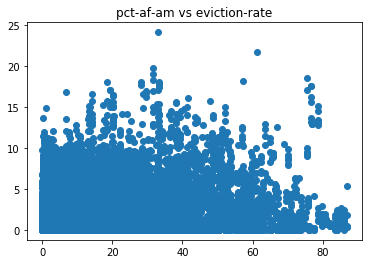

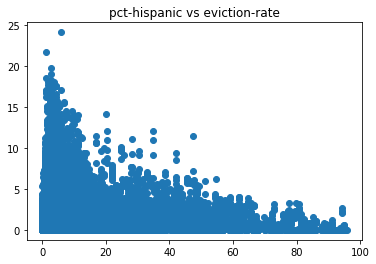

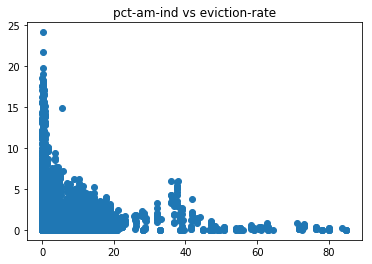

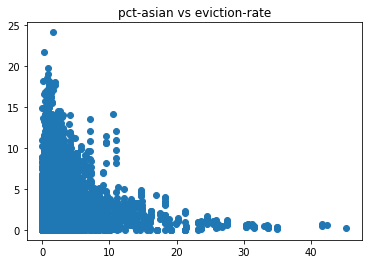

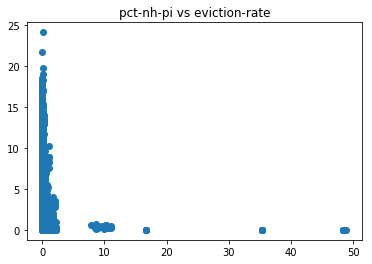

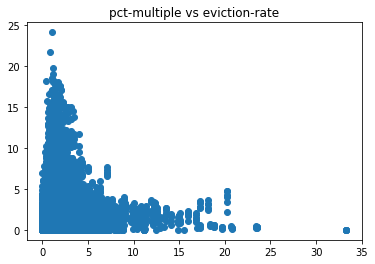

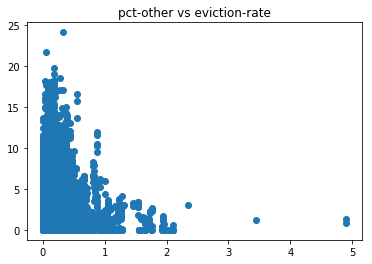

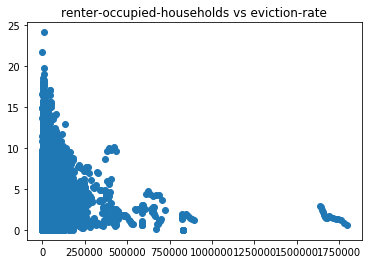

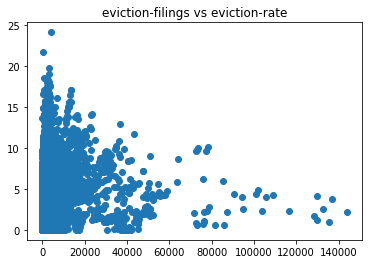

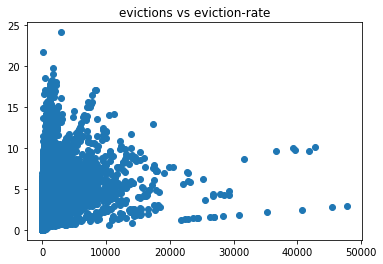

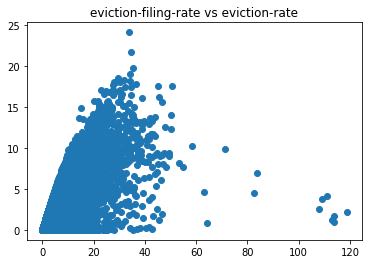

In [303]:
for i in xVars:
    x = data[i]
    plt.scatter(x,y)
    plt.title(''.join([i,' vs ',yVar]))
    plt.show()

In [319]:
def XYcorrelationCheck(data):    
    xVars = ['population',
       'poverty-rate', 'pct-renter-occupied', 'median-gross-rent',
       'median-household-income', 'median-property-value', 'rent-burden',
       'pct-white', 'pct-af-am', 'pct-hispanic', 'pct-am-ind', 'pct-asian',
       'pct-nh-pi', 'pct-multiple', 'pct-other',
       'renter-occupied-households', 'eviction-filings', 'evictions',
       'eviction-filing-rate']
    
    yVar = 'eviction-rate'
    
    vars_to_use = [] #potentialVars 
    correlations = pd.DataFrame(columns=['spearman corr','p-value'],index=xVars)
    for xVar in xVars:
        xy = pd.DataFrame(data[[xVar,yVar]])
        xyCorr = round(spearmanr(xy).correlation,2)
        pVal = spearmanr(xy).pvalue
        correlations.loc[xVar,'spearman corr'] = xyCorr 
        correlations.loc[xVar,'p-value'] = pVal         
        
        if abs(xyCorr) > 0.70 and pVal < 0.05:
            vars_to_use.append(xVar)
    correlations = correlations.sort_values('spearman corr',ascending=False)
    #varsUsed = []
    #for var in potentialVars:
    #    XYData = pd.DataFrame(data[[var,'QTY']])
    #    xyCorr = spearmanr(XYData)
    #    if xyCorr.correlation > 0.70:
    #        varsUsed.append((var,))
    
    #if ('ACTIVITY',) in varsUsed and ('DENSITY',) in varsUsed:
    
    
    return (vars_to_use,correlations)

In [320]:
result = XYcorrelationCheck(data)

In [321]:
print('variables that survived correlation test:')
rez = sorted(result[0],reverse=True)
for i in rez:
    print()
    print('   ',i)

variables that survived correlation test:

    evictions

    eviction-filings

    eviction-filing-rate


In [322]:
result[1]

,spearman corr,p-value
eviction-filing-rate,0.9,0
evictions,0.89,0
eviction-filings,0.83,0
renter-occupied-households,0.61,0
population,0.61,0
pct-af-am,0.41,0
pct-asian,0.39,0
pct-other,0.35,0
median-gross-rent,0.35,0
median-property-value,0.34,0


## <font color='#0b80a0'> Build a regression for each county </font> 

In [308]:
data = data.sort_values(['full_name','year']).set_index(['full_name','year'],drop=False)

In [309]:
data.head()

GEOID  year              name  \
full_name                       year                                  
Abbeville County-South Carolina 2010  45001  2010  Abbeville County   
                                2011  45001  2011  Abbeville County   
                                2012  45001  2012  Abbeville County   
                                2013  45001  2013  Abbeville County   
                                2014  45001  2014  Abbeville County   

                                     parent-location  population  \
full_name                       year                               
Abbeville County-South Carolina 2010  South Carolina       25417   
                                2011  South Carolina       24997   
                                2012  South Carolina       24997   
                                2013  South Carolina       24997   
                                2014  South Carolina       24997   

                                      poverty-rate  pct-renter-occupied  \
full_name                       year                                      
Abbeville County-South Carolina 2010         15.58                23.44   
                                2011         16.96                20.91   
                                2012         16.96                20.91   
                                2013         16.96                20.91   
                                2014         16.96                20.91   

                                      median-gross-rent  \
full_name                       year                      
Abbeville County-South Carolina 2010              593.0   
                                2011              562.0   
                                2012              562.0   
                                2013              562.0   
                                2014              562.0   

                                      median-household-income  \
full_name                       year                            
Abbeville County-South Carolina 2010                  35067.0   
                                2011                  34799.0   
                                2012                  34799.0   
                                2013                  34799.0   
                                2014                  34799.0   

                                      median-property-value  \
full_name                       year                          
Abbeville County-South Carolina 2010                90300.0   
                                2011                88300.0   
                                2012                88300.0   
                                2013                88300.0   
                                2014                88300.0   

                                                   ...                 \
full_name                       year               ...                  
Abbeville County-South Carolina 2010               ...                  
                                2011               ...                  
                                2012               ...                  
                                2013               ...                  
                                2014               ...                  

                                      pct-other  renter-occupied-households  \
full_name                       year                                          
Abbeville County-South Carolina 2010       0.09                        2342   
                                2011       0.00                        2371   
                                2012       0.00                        2400   
                                2013       0.00                        2429   
                                2014       0.00                        2458   

                                      eviction-filings  evictions  \
full_name                       year                                
Abbeville County-Sout

##### <font color='#0b80a0'> Test correlation of independent variables on dependent variable throw out those not correlated. < 0.70 correlation coefficient </font> 

In [386]:
def XYcorrelationCheck(data):    
    xVars = ['population',
       'poverty-rate', 'pct-renter-occupied', 'median-gross-rent',
       'median-household-income', 'median-property-value', 'rent-burden',
       'pct-white', 'pct-af-am', 'pct-hispanic', 'pct-am-ind', 'pct-asian',
       'pct-nh-pi', 'pct-multiple', 'pct-other',
       'renter-occupied-households']
    yVar = 'eviction-rate'
    vars_to_use = [] 
    correlations = pd.DataFrame(columns=['spearman corr','p-value'],index=xVars)
    for xVar in xVars:
        xy = pd.DataFrame(data[[xVar,yVar]])
        xyCorr = round(spearmanr(xy).correlation,2)
        pVal = spearmanr(xy).pvalue        
        if abs(xyCorr) > 0.70 and pVal < 0.05:
            vars_to_use.append(xVar)
    return vars_to_use

In [387]:
vars_to_use = data.groupby(level=[0],sort=False).apply(lambda x: XYcorrelationCheck(x))

In [388]:
numCountiesWithVars = 0
for county in counties:
    varz = vars_to_use[county]
    if len(varz) > 0:
        numCountiesWithVars += 1
rez = percentify(numCountiesWithVars,len(counties))
print('Percent of Counties with at least one independent variable to test:',rez)

Percent of Counties with at least one independent variable to test: 26%


In [389]:
vars_to_use.head()

full_name
Abbeville County-South Carolina                         [renter-occupied-households]
Acadia Parish-Louisiana                                                           []
Accomack County-Virginia                                                          []
Ada County-Idaho                   [population, poverty-rate, pct-renter-occupied...
Adair County-Iowa                                                                 []
dtype: object

##### <font color='#0b80a0'> Remove the 75% of counties that are not modelable with the data we have</font> 

In [390]:
countiesToRemove = []
for county in counties:
    varz = vars_to_use[county]
    if len(varz) == 0:
        vars_to_use.drop(county,inplace=True)
        data.drop(county,inplace=True,level='full_name')

In [400]:
print('Number of counties to model: ',len(vars_to_use))
print('Number of records in dataset: ',len(data))

Number of counties to model:  743
Number of records in dataset:  10945


In [984]:
modeled_counties = data.full_name.unique()

##### <font color='#0b80a0'> Build all of the possible combinations of independent variables to be tested for each county. If two independent variables are correlated with each other, don't build combos with them together. >0.70 correlation </font> 

In [784]:
def XXcorrelationCheck(data):
    county = data.full_name.unique()[0]
    xVars = vars_to_use[county]
    allXCombos = []
    if len(xVars) <= 1:
        allXCombos.append((xVars[0],))
    else:
        allXCombos.append([(i,) for i in xVars])
        twoCombos = list(combinations(xVars,2))
        allXCombos.append(twoCombos)
        for i in range(3,len(xVars)+1):
            allXCombos.append(list(combinations(xVars,i)))
        allXCombos = [y for x in allXCombos for y in x]
        
        #check for multicolinearity
        for var in twoCombos:
            twoCombosRev = (var[1],var[0])
            XXData = pd.DataFrame(data[[var[0],var[1]]])
            corrCoeff = spearmanr(XXData).correlation
            pVal = spearmanr(XXData).pvalue
            if abs(corrCoeff) > 0.70 and pVal < 0.05:           
                allXCombos = [i for i in allXCombos if var[0] not in i or var[1] not in i]
            
    return allXCombos

In [785]:
allXCombos = data.groupby(level=[0],sort=False).apply(lambda x: XXcorrelationCheck(x))

##### <font color='#0b80a0'> Create a regression model for each county, iterating through each viable combination of independent variable sets. </font> 

In [789]:
def perc_rmse(predicted,actual):
    error = (predicted-actual)**2
    rmse = np.sqrt(error.sum()/error.count())
    per_rmse_pred_ma = rmse/(actual.sum()/actual.count())
    return per_rmse_pred_ma

In [971]:
def createModels(county): 
    countyName = county.full_name.unique()[0]    
    predictions = {}
    
    sampleSize = len(county)
        
    county['sampleSize']= sampleSize 
        
    if sampleSize >= 2:
        equations = {}
        coefficients = {}
        intercepts = {}
        r2 = {}
        r2_adj = {}
        per_rmse = {}
        regSig = {}
        xVars = allXCombos.xs(key=(countyName)) 
        yActual = county['eviction-rate']
        
        for vars in xVars:
            xVarData = county[[v for v in vars]]
            
            xVarData = sm.add_constant(xVarData)
            equations[vars] = sm.OLS(yActual,xVarData,hasconst=True).fit()
            predictions[vars] = equations[vars].predict()
            numVars = len(vars)
            coefficients[vars] = equations[vars].params
            
            regSig[vars] = equations[vars].f_pvalue
            r2_adj[vars] = equations[vars].rsquared_adj
            per_rmse[vars] = perc_rmse(predictions[vars],yActual)
            

        result = (equations,coefficients,intercepts,r2_adj,per_rmse,regSig)
        return result

    else:
        return None

In [972]:
models = data.groupby(level=[0],sort=False).apply(lambda x: createModels(x))

In [3]:
HTML('''<script>code_show=true;function code_toggle() {if (code_show){
$('div.input').hide();} else {$('div.input').show();}code_show = !code_show} 
$( document ).ready(code_toggle);</script><a href="javascript:code_toggle()">Toggle Code</a>.''')

In [1089]:
def pickBestModel(models):
    county = models.index[0]
    models = models[county]
      
    selected_model = 'None yet selected'
    
    equations = models[0]
    coefficients = models[1]
    r2_adj = models[3]
    per_rmse = models[4]
    regSig = models[5]
    
    highest_r2_adj = max(r2_adj, key=r2_adj.get)
    lowest_error = min(per_rmse, key=per_rmse.get)
    lowest_regSig = min(regSig, key=regSig.get)

    #Step 0: If none of the models are statistically significant, don't choose any. (~4%)
    if regSig[lowest_regSig] >= 0.05:
        selected_model = 'No good models'
    
    #Step 1: If the model with the highest r2adj and lowest % rmse is the same and it's statistically significant, choose it. (~90% | 94%)
    isSame = highest_r2_adj == lowest_error
    if isSame == True and regSig[lowest_error] < 0.05:
        selected_model = lowest_error
    
    #Step 2: If the model with the lowest % rmse has a r2adj > 0.65, and it's statistically significant, choose it. (~2% | 96%)
    if selected_model == 'None yet selected':
        if r2_adj[lowest_error] >= 0.65 and regSig[lowest_error] < 0.05:
            selected_model = lowest_error
    
    #Step 3: If the model with the highest r2adj has a %rmse lower than 0.30, and it's statistically significant, choose it. (~1% | 98%)
    if selected_model == 'None yet selected':
        if per_rmse[highest_r2_adj] <= 0.35 and regSig[highest_r2_adj] < 0.05:
            selected_model = highest_r2_adj
    
    #Step 4: select a random model (~2% | 100%)
    if selected_model == 'None yet selected':
        selected_model = choice(list(r2_adj))
        
    return selected_model

In [1095]:
selected_model = models.groupby(level=[0],sort=False).apply(lambda x: pickBestModel(x))

In [1097]:
selected_model.head()

full_name
Abbeville County-South Carolina                 (renter-occupied-households,)
Ada County-Idaho                   (poverty-rate, renter-occupied-households)
Adair County-Missouri                                         (poverty-rate,)
Adams County-Indiana                                             (pct-other,)
Adams County-Ohio                                                (pct-white,)
dtype: object

##### <font color='#0b80a0'> File Prep... </font> 

In [1187]:
bmCols = ['full_name','county','state','r2_adj','per_rmse','sig','sampleSize','intercept']
for i in range(1,15):
    bmCols.append(''.join(['x',str(i)]))
for i in range(1,15):
    bmCols.append(''.join(['x',str(i),'_c']))
bestModel = pd.DataFrame(None,columns=bmCols,index=modeled_counties)

In [1189]:
for county in modeled_counties:
    bestModel.loc[county,'full_name'] = county
    bestModel.loc[county,'county'] = data['name'][data.full_name==county].unique()[0]
    bestModel.loc[county,'state'] = data['parent-location'][data.full_name==county].unique()[0]
    bestModel.loc[county,'r2_adj'] = models[county][3][selected_model[county]] if selected_model[county] != 'No good models' else None
    bestModel.loc[county,'per_rmse'] = models[county][4][selected_model[county]] if selected_model[county] != 'No good models' else None
    bestModel.loc[county,'sig'] = models[county][5][selected_model[county]] if selected_model[county] != 'No good models' else None
    bestModel.loc[county,'sampleSize'] = len(data[data.full_name==county])
    bestModel.loc[county,'intercept'] = models[county][1][selected_model[county]]['const'] if selected_model[county] != 'No good models' else None
    coefficients = models[county][1][selected_model[county]] if selected_model[county] != 'No good models' else None
    #print(coefficients)
    if selected_model[county] != 'No good models':
        for c in coefficients:
            ##print('///')
            for i in range(0,len(coefficients)):
                varName = coefficients.index[i]
                #print(varName)
                varField = ''.join(['x',str(i)])
                varValField = ''.join(['x',str(i),'_c'])
                if varName != 'const':
                    bestModel.loc[county,varField] = varName
                    bestModel.loc[county,varValField] = coefficients[varName]
    

In [1191]:
bestModel.to_csv('bestModel.csv')

In [1283]:
predictionsFile = pd.DataFrame(columns=['full_name','year','eviction-rate_pred'])

In [1198]:
predictions = {}
for county in modeled_counties:
    predictions[county] = models[county][0][selected_model[county]].predict() if selected_model[county] != 'No good models' else None

In [1224]:
predictions

{'Abbeville County-South Carolina': array([ 0.22464286,  0.96785714,  1.71107143,  2.45428571,  3.1975    ,
         3.94071429,  4.68392857]),
 'Ada County-Idaho': array([ 1.74556288,  1.68551077,  1.62541426,  1.56536215,  1.50531003,
         1.75636993,  1.69627343,  1.63622131,  1.57616919,  1.51607269,
         0.92885854,  0.93930106,  0.8691293 ,  0.79891315,  0.728697  ,
         0.65852523,  0.58830908]),
 'Adair County-Missouri': array([ 0.26461542,  0.26461542,  0.26461542,  0.26461542,  0.26461542,
         0.75551883,  0.75551883,  0.75551883,  0.75551883,  0.75551883,
         0.8716791 ,  0.88127494,  0.88127494,  0.88127494,  0.88127494,
         0.88127494,  0.88127494]),
 'Adams County-Indiana': array([ 0.1510011 ,  0.1510011 ,  0.1510011 ,  0.1510011 ,  0.1510011 ,
         0.09317657,  0.09317657,  0.09317657,  0.09317657,  0.09317657,
         0.3244747 ,  0.55577283,  0.55577283,  0.55577283,  0.55577283,
         0.55577283,  0.55577283]),
 'Adams County-Ohio': 

In [1292]:
for county in modeled_counties:
    years = data.year[data.full_name==county].unique()
    predz = pd.DataFrame(columns=['full_name','year','eviction-rate_pred'],index=years)

    for i in range(0,len(years)):
        predz.loc[years[i],'full_name'] = county if selected_model[county] != 'No good models' else None
        predz.loc[years[i],'year'] = years[i] if selected_model[county] != 'No good models' else None
        predz.loc[years[i],'eviction-rate_pred'] = predictions[county][i] if selected_model[county] != 'No good models' else None
    predictionsFile = predictionsFile.append(predz,ignore_index=True)

In [1295]:
predictionsFile.to_csv('predictions.csv')